<a href="https://colab.research.google.com/github/Ahmed-Ragab/machine-learning-zoomcamp/blob/main/Car_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
# Download data
!wget $data

--2025-10-08 16:48:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.07s   

2025-10-08 16:48:29 (11.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [ ]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').



In [6]:
# Check data type of each column
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [7]:
# Check columns' name
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

**Preparing the dataset**


In [8]:
# Use only columns: engine_displacement, horsepower, vehicle_weight, model_year, fuel_efficiency_mpg
df_new = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

**EDA**

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

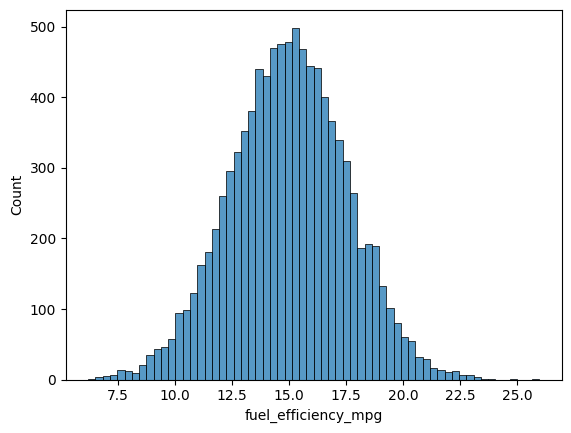

In [9]:
# Check the fuel_efficiency_mpg distribution
sns.histplot(df_new['fuel_efficiency_mpg'])

**Question 1**

In [10]:
# Check null values in each column
df_new.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


**Question 2**

In [11]:
# Get the median of horse power
df_new['horsepower'].median()

149.0

**Prepare and split the dataset**

In [12]:
df_new

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [13]:
# set a random seed and shuffle the dataframe
np.random.seed(42)
n = len(df_new)
idx = np.arange(n)
np.random.shuffle(idx)
df_new = df_new.iloc[idx]
df_new

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [14]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df_new.iloc[:int(n*0.6)]
df_val = df_new.iloc[int(n*0.6):int(n*0.8)]
df_test = df_new.iloc[int(n*0.8):]

In [15]:
# Reset index for each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Question 3**

Fill Null values using zeros

In [16]:
#Replacing null values with zeros in the train data set.
df_train['horsepower'] = df_train['horsepower'].fillna(0)
#df_val['horsepower'] = df_val['horsepower'].fillna(0)
#df_test['horsepower'] = df_test['horsepower'].fillna(0)

In [17]:
X_train = df_train.drop('fuel_efficiency_mpg', axis=1).values
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# **Linear Regression**

In [18]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]


In [19]:
w_0, w = train_linear_regression(X_train, y_train)

In [20]:
y_pred = w_0 + X_train.dot(w)

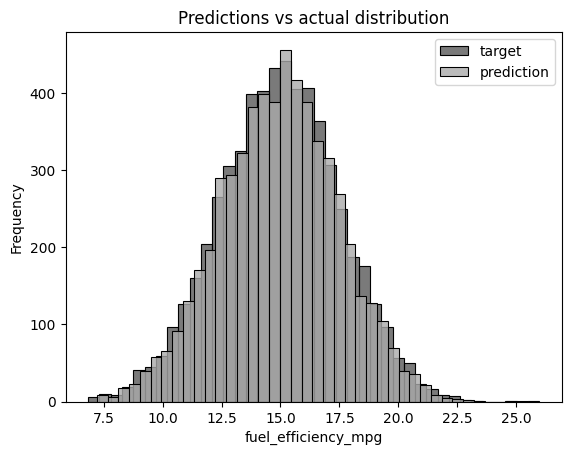

In [21]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [23]:
# Calculate RMSE
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [24]:
rmse(y_train, y_pred).round(2)

np.float64(0.52)

**Fill with mean**

In [25]:
# Use only columns: engine_displacement, horsepower, vehicle_weight, model_year, fuel_efficiency_mpg
df2 = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [26]:
# set a random seed and shuffle the dataframe
np.random.seed(42)
n = len(df2)
idx = np.arange(n)
np.random.shuffle(idx)
df2 = df2.iloc[idx]
df2

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [27]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df2.iloc[:int(n*0.6)]
df_val = df2.iloc[int(n*0.6):int(n*0.8)]
df_test = df2.iloc[int(n*0.8):]

In [29]:
# Reset index for each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
df_train['horsepower'] = df_train['horsepower'].fillna(df_train['horsepower'].mean())


In [31]:
X_train = df_train.drop('fuel_efficiency_mpg', axis=1).values
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [32]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]


In [33]:
w_0, w = train_linear_regression(X_train, y_train)

In [35]:
y_pred = w_0 + X_train.dot(w)

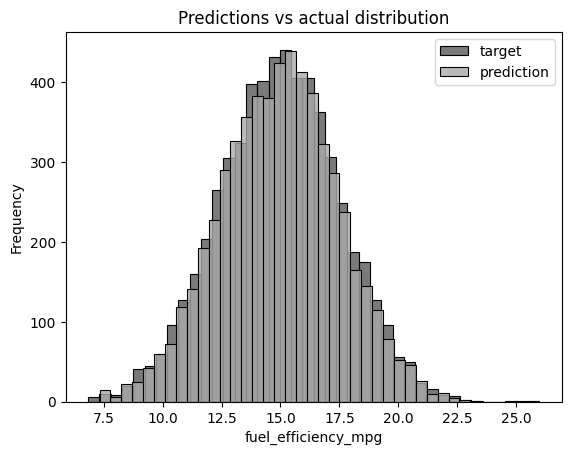

In [36]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [37]:
# Calculate RMSE
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [38]:
rmse(y_train, y_pred).round(2)

np.float64(0.46)

# **Regularization**

In [44]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df_new.iloc[:int(n*0.6)]
df_val = df_new.iloc[int(n*0.6):int(n*0.8)]
df_test = df_new.iloc[int(n*0.8):]

In [45]:
# Reset index for each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [46]:
df_train['horsepower'] = df_train['horsepower'].fillna(0)

In [47]:
def train_linear_regression_reg(X,y,r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]


In [59]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1).values
    X_val[:, 1] = np.nan_to_num(X_val[:, 1], nan=0)  # Fill nulls in 'horsepower' column with 0
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred).round(2))
    print('%6s' %r, rmse(y_val, y_pred).std())


     0 0.61
     0 0.0
  0.01 0.61
  0.01 0.0
   0.1 0.61
   0.1 0.0
     1 0.62
     1 0.0
     5 0.62
     5 0.0
    10 0.62
    10 0.0
   100 0.62
   100 0.0


In [53]:
# RMSE Standard Deviation
rmse(y_val, y_pred).round(2).std()

np.float64(0.0)

In [61]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = df_val.drop('fuel_efficiency_mpg', axis=1).values
X_val[:, 1] = np.nan_to_num(X_val[:, 1], nan=0)  # Fill nulls in 'horsepower' column with 0
y_pred_val = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_val))

X_test = df_test.drop('fuel_efficiency_mpg', axis=1).values
X_test[:, 1] = np.nan_to_num(X_test[:, 1], nan=0)  # Fill nulls in 'horsepower' column with 0
y_pred_test = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred_test))

validation: 0.6112343607431906
test: 0.6265765674662827


Question 5

In [62]:
rmse_scores = []

In [63]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
  pass # This loop will be filled in subsequent steps

In [64]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
  np.random.seed(seed)

In [65]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
  np.random.seed(seed)
  n = len(df_new)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df_new.iloc[idx]

  df_train = df_shuffled.iloc[:int(n*0.6)].reset_index(drop=True)
  df_val = df_shuffled.iloc[int(n*0.6):int(n*0.8)].reset_index(drop=True)
  df_test = df_shuffled.iloc[int(n*0.8):].reset_index(drop=True)

In [66]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
  np.random.seed(seed)
  n = len(df_new)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df_new.iloc[idx]

  df_train = df_shuffled.iloc[:int(n*0.6)].reset_index(drop=True)
  df_val = df_shuffled.iloc[int(n*0.6):int(n*0.8)].reset_index(drop=True)
  df_test = df_shuffled.iloc[int(n*0.8):].reset_index(drop=True)

  df_train['horsepower'] = df_train['horsepower'].fillna(0)

**Reasoning**:
Prepare the feature matrix and target variable for training the linear regression model using the training data, and for evaluation using the validation data.



In [67]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
  np.random.seed(seed)
  n = len(df_new)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df_new.iloc[idx]

  df_train = df_shuffled.iloc[:int(n*0.6)].reset_index(drop=True)
  df_val = df_shuffled.iloc[int(n*0.6):int(n*0.8)].reset_index(drop=True)
  df_test = df_shuffled.iloc[int(n*0.8):].reset_index(drop=True)

  df_train['horsepower'] = df_train['horsepower'].fillna(0)

  X_train = df_train.drop('fuel_efficiency_mpg', axis=1).values
  y_train = df_train['fuel_efficiency_mpg'].values
  X_val = df_val.drop('fuel_efficiency_mpg', axis=1).values
  y_val = df_val['fuel_efficiency_mpg'].values

In [68]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
  np.random.seed(seed)
  n = len(df_new)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df_new.iloc[idx]

  df_train = df_shuffled.iloc[:int(n*0.6)].reset_index(drop=True)
  df_val = df_shuffled.iloc[int(n*0.6):int(n*0.8)].reset_index(drop=True)
  df_test = df_shuffled.iloc[int(n*0.8):].reset_index(drop=True)

  df_train['horsepower'] = df_train['horsepower'].fillna(0)

  X_train = df_train.drop('fuel_efficiency_mpg', axis=1).values
  y_train = df_train['fuel_efficiency_mpg'].values
  X_val = df_val.drop('fuel_efficiency_mpg', axis=1).values
  y_val = df_val['fuel_efficiency_mpg'].values

  w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01) # Assuming r=0.01 is used from previous steps
  X_val[:, 1] = np.nan_to_num(X_val[:, 1], nan=0)  # Fill nulls in 'horsepower' column with 0
  y_pred_val = w_0 + X_val.dot(w)
  score = rmse(y_val, y_pred_val)
  rmse_scores.append(score)

Calculate the standard deviation of the collected RMSE scores.



In [69]:
std_rmse = np.std(rmse_scores)
print(f'The standard deviation of RMSE scores is: {std_rmse:.3f}')

The standard deviation of RMSE scores is: 0.008


In [73]:
std_rmse = round(std_rmse, 3)
std_rmse

np.float64(0.008)

# Question 6

In [74]:
# set a random seed and shuffle the dataframe
np.random.seed(9)
n = len(df_new)
idx = np.arange(n)
np.random.shuffle(idx)
df_new = df_new.iloc[idx]
df_new

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
2000,230,207.0,2873.307410,2002,16.109137
9577,180,161.0,2092.373630,2018,19.226011
3445,230,148.0,2279.042629,2019,18.863400
6491,210,126.0,2530.303225,2021,16.844500
6060,240,130.0,2591.825638,2012,17.788497
...,...,...,...,...,...
9680,240,222.0,2408.549741,2015,18.590424
7313,190,162.0,2920.875725,2013,15.939591
7120,190,191.0,3437.932653,2019,13.621708
1485,210,120.0,3121.911207,2004,14.013609


In [75]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df_new.iloc[:int(n*0.6)]
df_val = df_new.iloc[int(n*0.6):int(n*0.8)]
df_test = df_new.iloc[int(n*0.8):]

In [76]:
df_combine = pd.concat([df_train, df_val])

In [78]:
df_combine['horsepower'] = df_combine['horsepower'].fillna(0)

In [79]:
def train_linear_regression_reg(X,y,r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]


In [81]:
w_0, w = train_linear_regression(X_test, y_test)

In [82]:
y_pred = w_0 + X_test.dot(w)

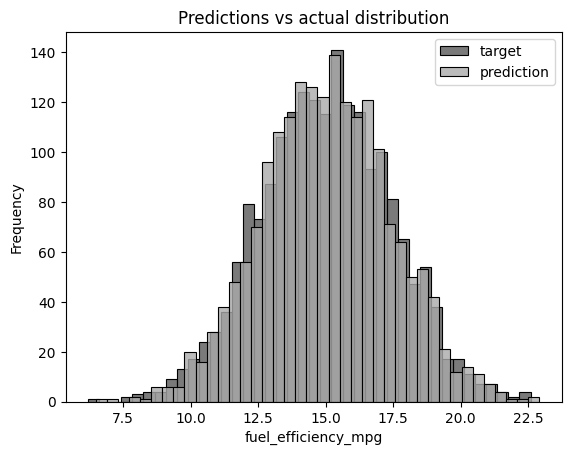

In [87]:
sns.histplot(y_test, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [84]:
# Calculate RMSE
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [86]:
rmse(y_test, y_pred).round(2)

np.float64(0.52)